In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_regression.csv')
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# Inspecting & cleaning up the frame

In [3]:
def inspection(dataframe):
    print('Types of variables we are working with:')
    print(dataframe.dtypes)
    print()
    print('Total Samples with missing values:')
    print(df.isnull().any(axis=1).sum())
    print('Total missing values per variable\n')
    print(df.isnull().sum())
    print('Map of Missing values:')
    print()
    sns.heatmap(dataframe.isnull())

Types of variables we are working with:
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

Total Samples with missing values:
82
Total missing values per variable

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_ma

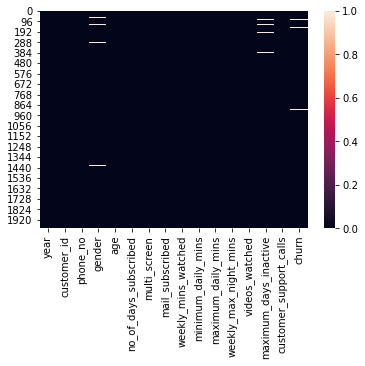

In [4]:
inspection(df)

In [5]:
df.shape

(2000, 16)

In [6]:
df=df.dropna()
df.shape

(1918, 16)

In [7]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

# Encoding categorical variables

In [8]:
df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
def encode_categories(df,variables):
    ord_enc=OrdinalEncoder()
    for v in variables:
        name=v+'_code'
        df[name]=ord_enc.fit_transform(df[[v]])
        print('The encoded values for '+ v +' are:')
        print(df[name].unique())

In [10]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0


In [11]:
encode_categories(df,['gender','multi_screen','mail_subscribed'])

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


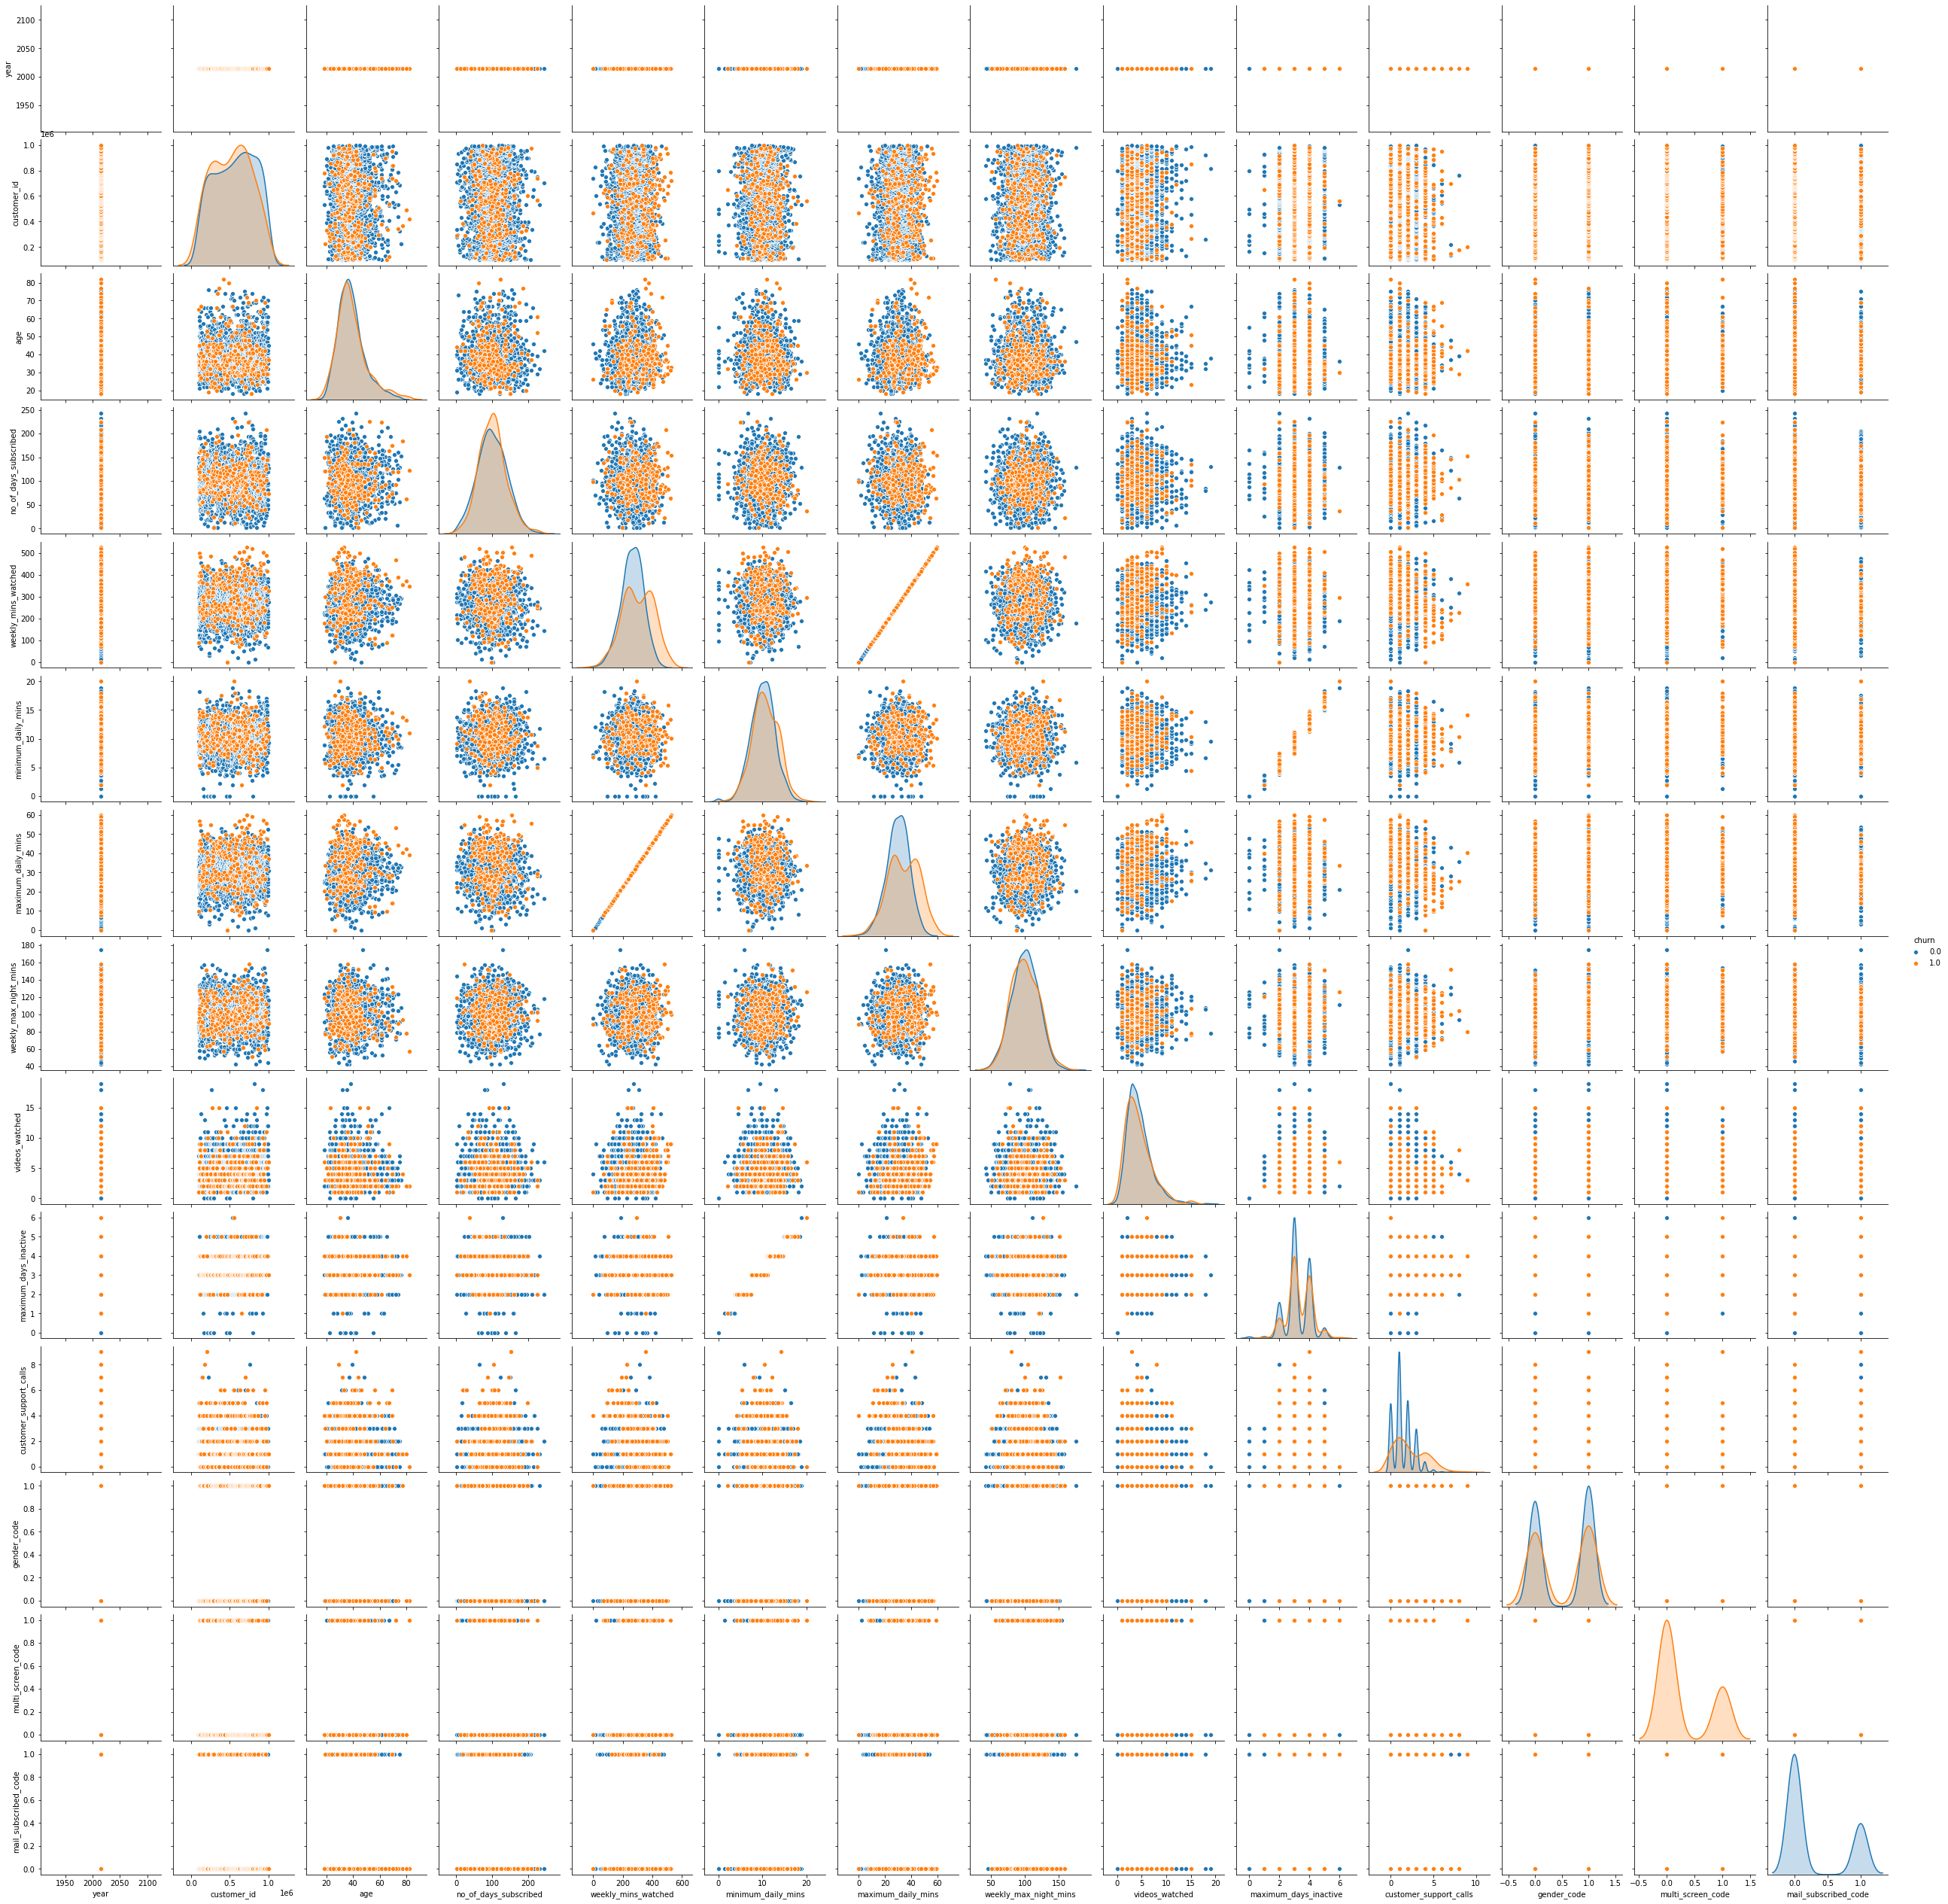

In [13]:
def full_diagnostic(df,class_col,cols_to_exclude):
    cols=df.select_dtypes(include=np.number).columns.tolist()
    x=df[cols]
    x=x[x.columns.difference(cols_to_exclude)]
    x=x[x.columns.difference([class_col])]
    sns.pairplot(df,hue=class_col)
    
full_diagnostic(df,class_col='churn',cols_to_exclude=['customer_id','phone_no','year'])

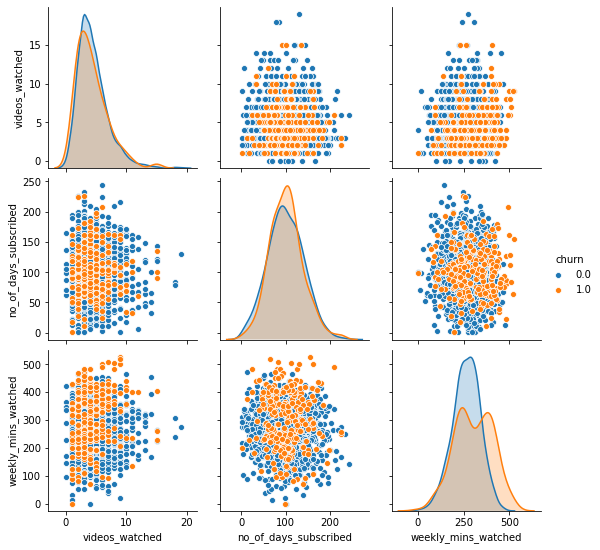

In [14]:
def selected_diagnostic(df,class_col,cols_to_eval):
    cols_to_eval.append(class_col)
    x=df[cols_to_eval]
    sns.pairplot(x,hue=class_col)
    
selected_diagnostic(df,class_col='churn',cols_to_eval=['videos_watched','no_of_days_subscribed','weekly_mins_watched'])

# Build logistic regression model with statsmodel

In [15]:
import statsmodels.api as sm


def logistic_regression(df,class_col,cols_to_exclude):
    cols=df.select_dtypes(include=np.number).columns.tolist()
    x=df[cols]
    x=x[x.columns.difference(cols_to_exclude)]
    x=x[x.columns.difference([class_col])]

    y=df[class_col]
    logit_model=sm.Logit(y,x)
    result=logit_model.fit()
    print(result.summary())
    
logistic_regression(df,class_col='churn',cols_to_exclude=['customer_id','phone_no','year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 1918
Model:                          Logit   Df Residuals:                     1906
Method:                           MLE   Df Model:                           11
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.1370
Time:                        20:38:57   Log-Likelihood:                -645.57
converged:                       True   LL-Null:                       -748.02
Covariance Type:            nonrobust   LLR p-value:                 7.175e-38
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                       -0.0208      0.007     -3.074      0.002      -0.034      

# Build Logistic regression model with Sklearn

In [16]:
df.head(2)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['multi_screen']=le.fit_transform(df['multi_screen'])
df['mail_subscribed']=le.fit_transform(df['mail_subscribed'])

In [25]:
x=df.iloc[:,3:-4]
x.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2


In [26]:
y=df.iloc[:,-4:-3]
y.head(2)

,churn
0,0.0
1,0.0


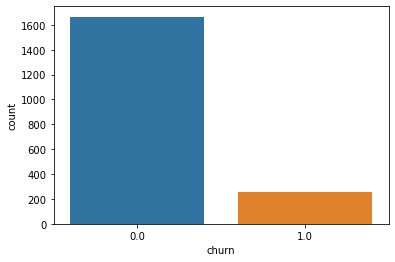

In [27]:
sns.countplot(df['churn'])

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
print('Training is started...')
print()
log_reg.fit(xtrain,ytrain)
print('Coefficients:\n',log_reg.coef_)
print()
print('Classes:\n',log_reg.classes_)
print('Training is completed!!!')
print()
print('Test is running...')
ypred=log_reg.predict(xtest)
print('Predicted classes:\n',ypred)
print('Testing is completed!!')

#Performance
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('\033[1m''->]'*63)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Accuracy:\t',accuracy_score(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))


Training is started...



C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Coefficients:
 [[ 5.96113732e-03 -2.20697639e-02 -6.24995959e-03  3.88932649e-01
  -1.93177853e-01  2.76507898e-03  4.54465712e-02  1.08204825e-04
  -1.61104920e-02 -4.69189101e-02 -1.15610057e-01  4.29643975e-01]]

Classes:
 [0. 1.]
Training is completed!!!

Test is running...
Predicted classes:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

C:\Users\govindaraj.venugopal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


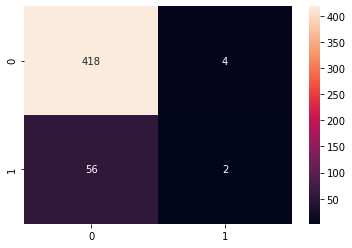

In [31]:
cm=confusion_matrix(ytest,ypred)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='g')
ax.set_xlabel('predicted labels');ax.set.ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['retained','churned'])